<h1> Kωνσταντίνος Κωνσταντόπουλος - 1η Εργασία Μηχανικής Μάθησης</h1>

<h1> AM: p3170086</h1>

<h2> Exploring the Rosetta Stone of Human Capital </h2>

<h3> Initialization </h3>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

from collections import defaultdict
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats.stats as stats
%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)

<h2> Q1: Income and Test Results </h2>

* We read the WDI data file, rename the column so it is easier to read and clear out all NaN values. We also keep every third row because we only need info about the GDP.

In [2]:
wd=pd.read_csv("WDI_data.csv")

wd = wd.rename(columns={"2015 [YR2015]": "YR2015"}) 
wd.dropna(inplace=True)
wd=wd.iloc[::3, :]
wd

,Country Name,Country Code,Series Name,Series Code,YR2015
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
12,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
...,...,...,...,...,...
777,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
780,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
783,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
786,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


* We read the Country Scores file
* Rename the columns so it is easier to read 
* Cast the column data types to float

In [3]:
country_scores = pd.read_excel("patel-sandefur-human-capital-final-results.xlsx",sheet_name = "Country Scores", index_col=0)

country_scores = country_scores.rename(columns={"Median Math Score (TIMSS Scale, 4th Grade)": "TIMSS","Median Reading Score (PIRLS Scale, 4th Grade)":"PIRLS"}) 

country_scores[['TIMSS','PIRLS']] = country_scores[['TIMSS','PIRLS']].astype(float)



country_scores

,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS
Country,,,,,
U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
Argentina,ARG,51.000000,66.000000,406.652557,431.443542
Armenia,ARM,71.505402,NaN,454.000000,NaN
Australia,AUS,90.000000,92.932800,520.000000,534.000000
Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...
Turkey,TUR,77.000000,NaN,477.000000,NaN
Uruguay,URY,57.000000,70.000000,424.912933,450.448608
United States,USA,96.000000,97.517357,544.000000,560.000000


* Merging the WDI data and country scores dataframe will give us access to the GDP of each country. We also log the YR2015 column to transform skewed data.

In [4]:
country_scores=pd.merge(country_scores, 
               wd[['Country Code','Country Name','YR2015']], 
               on='Country Code', 
               how='left')


country_scores[['YR2015']] = country_scores[['YR2015']].astype(float)

country_scores[['YR2015']]=np.log(country_scores[['YR2015']])
country_scores

,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,Country Name,YR2015
0,ARE,64.000000,63.982311,437.000000,440.000000,United Arab Emirates,11.097037
1,ARG,51.000000,66.000000,406.652557,431.443542,Argentina,9.857512
2,ARM,71.505402,NaN,454.000000,NaN,Armenia,9.011393
3,AUS,90.000000,92.932800,520.000000,534.000000,Australia,10.685550
4,AUT,95.302193,97.104111,511.000000,533.000000,Austria,10.699955
...,...,...,...,...,...,...,...
73,TUR,77.000000,NaN,477.000000,NaN,Turkey,10.059999
74,URY,57.000000,70.000000,424.912933,450.448608,Uruguay,9.895024
75,USA,96.000000,97.517357,544.000000,560.000000,United States,10.878600
76,YEM,9.265388,NaN,243.000000,NaN,"Yemen, Rep.",7.878930


* In some cases, only one of the two columns may be NaN, so to make sure that a whole row isn't excluded because one of them is NaN, we create 2 dataframes that hold all rows with non NaN values in the corresponding column.

In [5]:
timss_df = country_scores[~country_scores['TIMSS'].isna()]
pirls_df = country_scores[~country_scores['PIRLS'].isna()]

* We create a model and then fit it.

In [6]:
timss = smf.ols("TIMSS ~ YR2015", data=timss_df)
timss_res = timss.fit()
timss_res.params

Intercept    46.117041
YR2015       41.745974
dtype: float64

* That means that the relationship between `TIMSS` ($y$) and `YR2015` ($x$) is: $$ y = 46.117041 + 41.745974 x $$

In [7]:
timss_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        02:17:14   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
YR2015        41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Below we see the desired diagram.

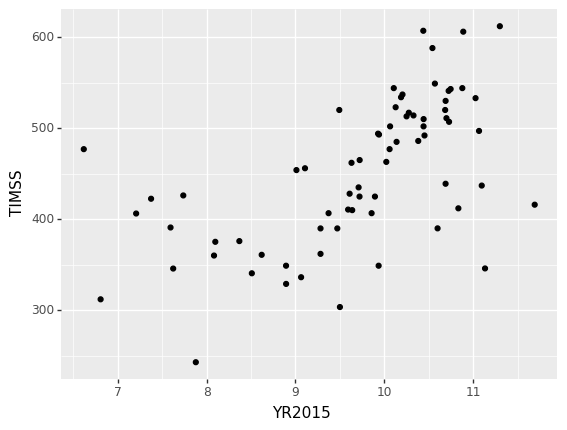

<ggplot: (111822569566)>

In [8]:
ggplot(data=timss_df) +\
    geom_point(mapping=aes(x='YR2015', y='TIMSS'))

* We work on the PIRLS data in the same manner.

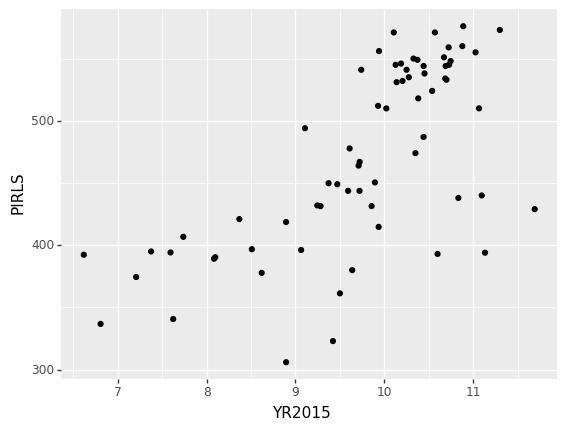

<ggplot: (111823314695)>

In [9]:
pirls = smf.ols("PIRLS ~ YR2015", data=pirls_df)
pirls_res = pirls.fit()
ggplot(data=pirls_df) +\
    geom_point(mapping=aes(x='YR2015', y='PIRLS'))

* That means that the relationship between `PIRLS` ($y$) and `YR2015` ($x$) is: $$ y = 42.619127 + 43.912415 x $$

In [10]:
pirls_res.params

Intercept    42.619127
YR2015       43.912415
dtype: float64

<h2> Q2: Years of Schooling and Test Scores </h2>

* We read the data and do the necessary column renaming. We also keep the 2010 data.

In [11]:
stata = pd.read_stata('BL2013_MF1599_v2.2.dta')

stata[['year']] =stata[['year']].astype(int)
stata = stata.rename(columns={"country":"Country Name","WBcode":'Country Code'}) 
stata = stata[stata['year']==2010]

stata

,BLcode,Country Name,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,Country Code,region_code
12,1.0,Algeria,2010,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,326.0,Republic of Moldova,2010,MF,15.0,999.0,0.976749,6.086153,3.653862,78.326561,54.266289,14.610540,8.756674,10.404020,3.912284,6.024392,0.467344,2982.0,ROM,Europe and Central Asia
1858,329.0,Serbia,2010,MF,15.0,999.0,2.960607,8.992959,7.690698,73.507530,48.711517,14.538917,8.968564,10.845333,6.029522,4.345661,0.470150,8667.0,SER,Europe and Central Asia
1871,331.0,Slovenia,2010,MF,15.0,999.0,0.657998,3.077496,2.661207,76.408531,56.119919,19.855972,13.252562,11.890487,6.387317,4.841000,0.662170,1700.0,SVN,Europe and Central Asia
1884,342.0,"China, Macao Special Administrative Region",2010,MF,15.0,999.0,3.457963,21.363201,16.163477,58.113544,32.111195,17.065292,10.434196,8.543072,4.873250,3.119832,0.549990,416.0,MAC,East Asia and the Pacific


* We merge the Country Scored and stata dataframe to combine data for each country.

In [12]:
country_scores=pd.merge(country_scores, 
               stata[['Country Name','Country Code','yr_sch']], 
               on='Country Code', 
               how='left')

* Clear our dataframe from NaN values.

In [13]:
country_scores=country_scores[~country_scores.yr_sch.isna()]

* We create a model and fit it.

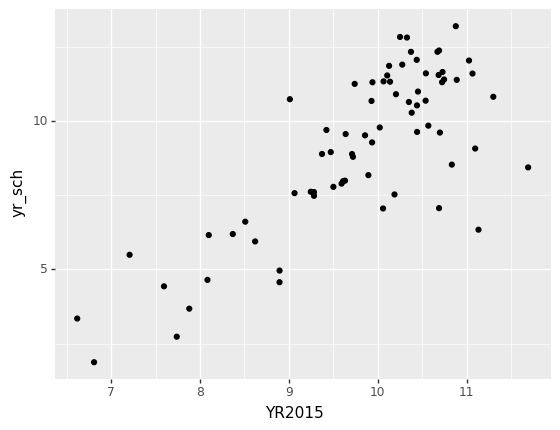

<ggplot: (111822569596)>

In [14]:
sch = smf.ols("yr_sch ~ YR2015", data=country_scores)
sch_res = sch.fit()
ggplot(data=country_scores) +\
    geom_point(mapping=aes(x='YR2015', y='yr_sch'))

* We store the residuals from above.

In [15]:
country_scores['resid_sch']=sch_res.resid.to_frame()
country_scores['timss_sch']=timss_res.resid.to_frame()
country_scores['pirls_sch']=pirls_res.resid.to_frame()

* In some cases, only one of the two columns may be NaN, so to make sure that a whole row isn't excluded because one of them is NaN, we create 2 dataframes that hold all rows with non NaN values in the corresponding column.

In [16]:
timss_df = country_scores[~country_scores['timss_sch'].isna()]
pirls_df = country_scores[~country_scores['pirls_sch'].isna()]

* We create the model and fit it.

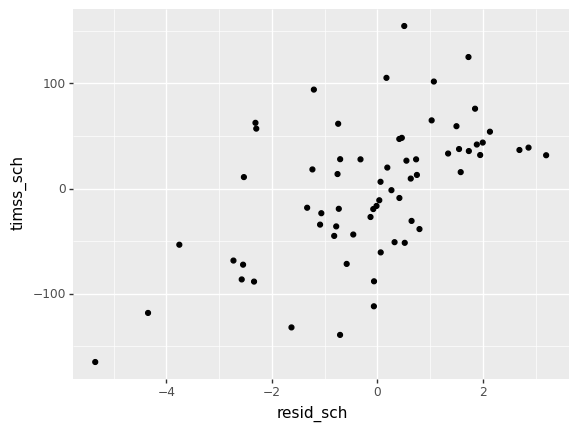

<ggplot: (111823381155)>

In [17]:
tim = smf.ols("timss_sch ~ resid_sch", data=timss_df)
tim_res = tim.fit()
ggplot(data=timss_df) +\
    geom_point(mapping=aes(x='resid_sch', y='timss_sch'))

* That means that the relationship between `timss_sch` ($y$) and `resid_sch` ($x$) is: $$ y =1.415540 + 21.585637 x $$

In [18]:
tim_res.params

Intercept     1.415540
resid_sch    21.585637
dtype: float64

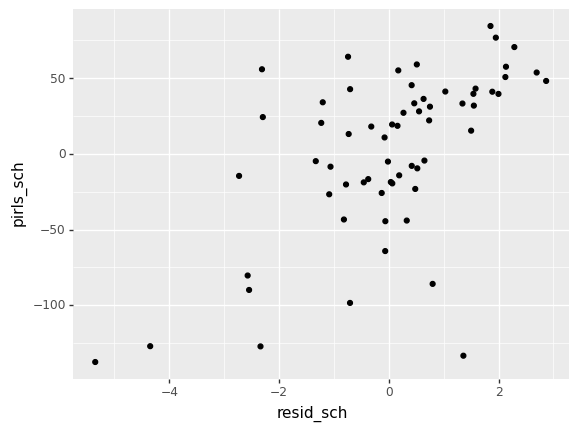

<ggplot: (111823513670)>

In [19]:

pirl = smf.ols("pirls_sch ~ resid_sch", data=pirls_df)
pirls_res = pirl.fit()
ggplot(data=pirls_df) +\
    geom_point(mapping=aes(x='resid_sch', y='pirls_sch'))

* That means that the relationship between `pirls_sch` ($y$) and `resid_sch` ($x$) is: $$ y =0.694772 + 20.253116 x $$

In [20]:
pirls_res.params

Intercept     0.694772
resid_sch    20.253116
dtype: float64

<h2> Q3: Compare New and Previous Estimates </h2>

* We read the data and clear the rows with a NaN value. We group by the country code and keep the row with the newest year value.

In [21]:
hlo = pd.read_stata("HLO Panel Data (mean, thresh) - Jan 2018.dta")
hlo = hlo.rename(columns={"cntabb":"Country Code"}) 
hlo = hlo[hlo['low_threshold'].notna()]
hlo = hlo.loc[hlo.groupby('Country Code')['year'].idxmax()]
hlo

,country,idcntry,Country Code,year,HLO,low_threshold
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
526,"Dubai, UAE",7841,ADU,2015,510.089996,91.440002
21,Albania,8,ALB,2015,436.730011,70.650002
54,"Argentina, Buenos Aires",974,ARB,2015,414.190002,67.750000
1760,United Arab Emirates,784,ARE,2015,460.489990,80.839996
...,...,...,...,...,...,...
1814,Yemen,887,YEM,2010,297.200012,40.000000
1560,South Africa,710,ZAF,2015,374.059998,53.200001
1835,Zanzibar,9834,ZAN,2005,321.880005,38.040001
1824,Zambia,894,ZMB,2005,324.459991,27.500000


In [22]:
country_scores=pd.merge(country_scores, 
               hlo[['Country Code','HLO','low_threshold']], 
               on='Country Code', 
               how='inner')
country_scores

,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,Country Name_x,YR2015,Country Name_y,yr_sch,resid_sch,timss_sch,pirls_sch,HLO,low_threshold
0,ARE,64.000000,63.982311,437.000000,440.000000,United Arab Emirates,11.097037,United Arab Emirates,9.066772,-2.545659,-72.373659,-89.916813,460.489990,80.839996
1,ARG,51.000000,66.000000,406.652557,431.443542,Argentina,9.857512,Argentina,9.510379,0.326660,-50.975909,-44.042720,429.380005,70.860001
2,ARM,71.505402,NaN,454.000000,NaN,Armenia,9.011393,Armenia,10.726531,3.200686,31.693559,NaN,469.070007,86.129997
3,AUS,90.000000,92.932800,520.000000,534.000000,Australia,10.685550,Australia,11.541207,0.735040,27.804280,22.152588,509.220001,91.529999
4,AUT,95.302193,97.104111,511.000000,533.000000,Austria,10.699955,Austria,9.603404,-1.230990,18.202895,20.519995,519.539978,88.510002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,TUR,77.000000,NaN,477.000000,NaN,Turkey,10.059999,Turkey,7.050123,-2.530347,10.918500,NaN,470.390015,79.449997
67,URY,57.000000,70.000000,424.912933,450.448608,Uruguay,9.895024,Uruguay,8.171520,-1.085701,-34.281533,-26.684923,445.450012,72.650002
68,USA,96.000000,97.517357,544.000000,560.000000,United States,10.878600,USA,13.182642,1.998214,43.745211,39.675288,529.090027,93.300003
69,YEM,9.265388,NaN,243.000000,NaN,"Yemen, Rep.",7.878930,Yemen,3.678734,-1.628176,-132.030663,NaN,297.200012,40.000000


* We keep the data that hold no NaN values in either of the 2 columns that will be used in the Spearman test.

In [23]:
no_nan_timss = country_scores[(~country_scores['Percent Above Math Benchmark (400 on TIMSS Scale)'].isna())&(~country_scores['low_threshold'].isna())]

no_nan_pirls = country_scores[(~country_scores['Percent Above Reading Benchmark (400 on PIRLS Scale)'].isna())&(~country_scores['low_threshold'].isna())]

print('Spearman', stats.spearmanr(no_nan_timss['low_threshold'], no_nan_timss['Percent Above Math Benchmark (400 on TIMSS Scale)']))
print('Spearman', stats.spearmanr(no_nan_pirls['low_threshold'], no_nan_pirls['Percent Above Reading Benchmark (400 on PIRLS Scale)']))

Spearman SpearmanrResult(correlation=0.8999064461039283, pvalue=1.162552047977636e-23)
Spearman SpearmanrResult(correlation=0.8936838306170773, pvalue=7.562418456724025e-22)


C:\Users\tinoa\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


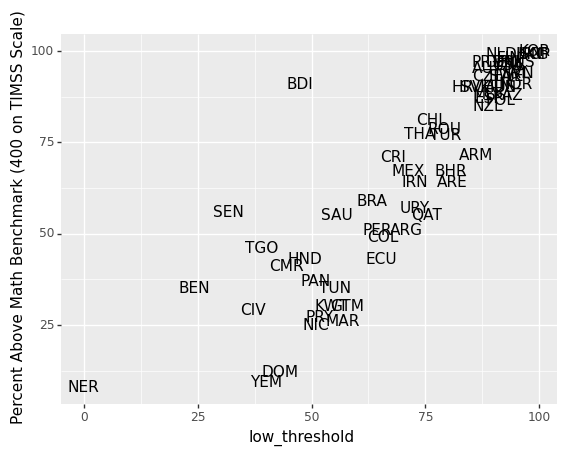

<ggplot: (111823525840)>

In [24]:
ggplot(no_nan_timss, aes(x= 'low_threshold', y= 'Percent Above Math Benchmark (400 on TIMSS Scale)', label='Country Code'))+geom_text(aes(label='Country Code'))

C:\Users\tinoa\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


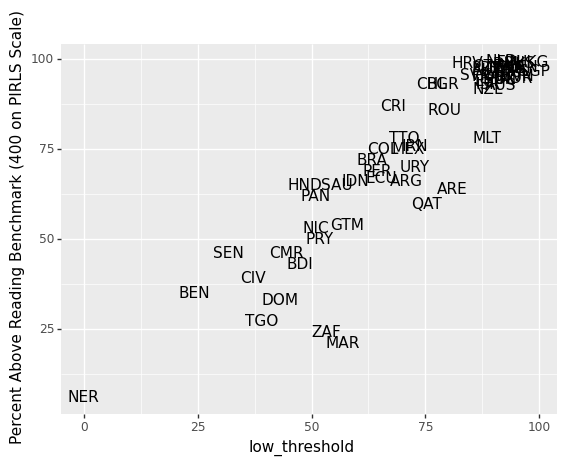

<ggplot: (111823457335)>

In [25]:
ggplot(no_nan_pirls, aes(x= 'low_threshold', y= 'Percent Above Reading Benchmark (400 on PIRLS Scale)', label='Country Code'))+geom_text(aes(label='Country Code'))

<h2> Q4: Skills Intensity </h2>

* We read the 2000 USA CENSUS data,the crosswalk industry code file and then filter our dataframe into two separate dataframes, one that includes persons that have at least a highschool degree and persons who have at least a college degree. 

In [26]:
usa = pd.read_csv("usa_00001.csv.gz")

cw_ind = pd.read_stata("cw_ind2000_ind1990ddx.dta")
cw_ind = cw_ind.rename(columns={"ind2000":"IND"}) 

usa_college = usa[usa['EDUC']>=10]
usa_high_school =  usa[(usa['EDUC']>=6)&(usa['EDUC']<10)]

* We then group each of our 3 dataframes individually by industry code and apply a sum agg to find out how many people have the specified qualifications in each industry.

In [27]:
usa=usa.groupby('IND').agg({'PERWT':'sum'}).reset_index()

college_group=usa_college.groupby('IND').agg({'PERWT':'sum'}).reset_index()
college_group = college_group.rename(columns={"PERWT":"COLLEGE_TOTAL"}) 

school_group=usa_high_school.groupby('IND').agg({'PERWT':'sum'}).reset_index()
school_group = school_group.rename(columns={"PERWT":"SCHOOL_TOTAL"})

* We merge each of our 2 filtered dataframes with the main dataframe to gain access to the total population that works in each industry. We can now calculate the portion of persons in each distinct industry code with the specified qualifications.

In [28]:
college_group=pd.merge(college_group, 
               usa, 
               on='IND', 
               how='inner')
college_group['COLLEGE_PORTION']=college_group['COLLEGE_TOTAL']/college_group['PERWT']

school_group=pd.merge(school_group, 
               usa, 
               on='IND', 
               how='inner')
school_group['SCHOOL_PORTION']=school_group['SCHOOL_TOTAL']/school_group['PERWT']

* For each industry code of 2000 we generate data based on the mapping of the 1990 industry codes to the 2000 industry codes. 

* Then, we compute the highschool portion per 1990 industry codes as the weighted average of the highschool portions per 2000 industry codes, where as weight we consider the sum of people per 1990 industry codes as a result of the 2000 industry codes mapping. We work in similar manner for the college portion. 


* The formula for the given weighted average is: $ \frac{\sum_{i=0}^n weight*PERWT*SCHOOLPORTION }{\sum_{i=0}^n weight*PERWT }$

In [29]:
school_group=pd.merge(school_group, 
               cw_ind, 
               on='IND', 
               how='inner')
school_group=school_group.groupby('ind1990ddx').apply(lambda x: np.average(x.SCHOOL_PORTION, weights=x.weight*x.PERWT)).reset_index(name="HIGH")

college_group=pd.merge(college_group, 
               cw_ind, 
               on='IND', 
               how='inner')
college_group=college_group.groupby('ind1990ddx').apply(lambda x: np.average(x.COLLEGE_PORTION, weights=x.weight*x.PERWT)).reset_index(name="COL")

* We then merge all of our dataframes to create the skills_intensity_industry dataframe.

In [30]:
skills_intensity_industry=pd.merge(college_group, 
               school_group, 
               on='ind1990ddx', 
               how='left')

* Read the exports data.

In [31]:
exports = pd.read_csv("BACI_HS17_Y2018_V202001.csv.gz")
exports

,t,i,j,k,v,q
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


* We read the HS6-crosswalk file and merge with the exports dataframe.

In [32]:
cw_hs6 = pd.read_stata("cw_hs6_sic87dd.dta")

cw_hs6['hs6']=cw_hs6['hs6'].astype('int64')

cw_hs6 = cw_hs6.rename(columns={'hs6':'k'})

exports=pd.merge(exports, 
               cw_hs6, 
               on='k', 
               how='inner')
exports

,t,i,j,k,v,q,sic87dd,share,weights_method
0,2018,4,24,845420,101.397000,26.000000,3321.0,0.636426,trade-based
1,2018,4,24,845420,101.397000,26.000000,3559.0,0.363574,trade-based
2,2018,36,288,845420,16.384946,0.177000,3321.0,0.636426,trade-based
3,2018,36,288,845420,16.384946,0.177000,3559.0,0.363574,trade-based
4,2018,36,360,845420,7.109000,0.017000,3321.0,0.636426,trade-based
...,...,...,...,...,...,...,...,...,...
9631891,2018,842,124,811251,3.370410,0.019558,3399.0,1.000000,no weights needed
9631892,2018,842,156,811251,3.005000,0.002000,3399.0,1.000000,no weights needed
9631893,2018,842,276,811251,31.709764,0.186699,3399.0,1.000000,no weights needed
9631894,2018,842,410,811251,20.110000,0.010000,3399.0,1.000000,no weights needed


* Our new value of trade flow is the product of itself with the share value.

* We group our dataframe to get our data so that we have the total value per exporter and industry.

In [33]:
exports['v']=exports['v']*exports['share']

exports = exports.groupby(['i','sic87dd']).agg({'v': "sum"}).reset_index()

* We read the sic87-crosswalk file and marge it with the exports dataframe.

In [34]:
cw_sic87 = pd.read_stata("cw_sic87_ind1990ddx.dta")

cw_sic87 = cw_sic87.rename(columns={'sic87':'sic87dd'})


exports = pd.merge(exports, 
               cw_sic87, 
               on='sic87dd', 
               how='inner')

* We read the country code file and marge it with the exports dataframe.

In [35]:
country_cd = pd.read_csv("country_codes_V202001.csv.gz", encoding="ISO-8859-1")

country_cd = country_cd.rename(columns={'country_code':'i','iso_3digit_alpha':'Exporter'})

exports=pd.merge(exports, 
               country_cd[['i','Exporter']], 
               on='i', 
               how='inner')

* We merge the exports dataframe with the skills_intensity_industry and country scores dataframes.

In [36]:
exports=pd.merge(exports, 
               skills_intensity_industry, 
               on='ind1990ddx', 
               how='inner')

country_scores = country_scores.rename(columns={'Country Code':'Exporter'})

exports=pd.merge(exports, 
               country_scores, 
               on='Exporter', 
               how='inner')

* We do the necessary adjustments to our data.

In [37]:
exports['v']=np.log(exports['v'])
exports['TIMSS']=exports['TIMSS']/1000

In [38]:
pirls_copy=exports[~exports['PIRLS'].isna()]
timss_copy=exports[~exports['TIMSS'].isna()]

* The $R^2$ for the 1st regression is 0.51 and the intercept is 10.0845

In [39]:
sch = smf.ols("v~TIMSS:COL+ind1990ddx+Exporter", data=timss_copy)
sch_res = sch.fit()
sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      v   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     409.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:17:34   Log-Likelihood:                -60154.
No. Observations:               25263   AIC:                         1.204e+05
Df Residuals:                   25198   BIC:                         1.210e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.0845      0.131     76.823      0.000       9.827      10.342
Exporter[T.ARG]    -2.2984      0.178    -12.880      0.000      -2.648      -1.949
Exporter[T.ARM]    -5.3993      0.184    -29.278      0.000      -5.761      -5.038
Exporter[T.AUS]    -0.6727      0.178     -3.782      0.000      -1.021      -0.324
Exporter[T.AUT]     0.4514      0.178      2.539      0.011       0.103       0.800
Exporter[T.BDI]    -8.8395      0.268    -33.025      0.000      -9.364      -8.315
Exporter[T.BEN]    -8.4390      0.224    -37.620      0.000      -8.879      -7.999
Exporter[T.BHR]    -3.8183      0.182    -21.031      0.000      -4.174      -3.462
Exporter[T.BRA]    -0.3919      0.178     -2.207      0.027      -0.740      -0.044
Exporter[T.CHL]    -2.2906      0.178    -12.837      0.000      -2.640      -1.941
Exporter[T.CIV]    -4.8449      0.183    -26.445      0.000      -5.204      -4.486
Exporter[T.CMR]    -6.6625      0.192    -34.755      0.000      -7.038      -6.287
Exporter[T.COL]    -2.3798      0.178    -13.343      0.000      -2.729      -2.030
Exporter[T.CRI]    -3.6551      0.180    -20.350      0.000      -4.007      -3.303
Exporter[T.CZE]     0.3972      0.178      2.237      0.025       0.049       0.745
Exporter[T.DEU]     2.6815      0.178     15.107      0.000       2.334       3.029
Exporter[T.DNK]    -0.1826      0.178     -1.027      0.305      -0.531       0.166
Exporter[T.DOM]    -4.5647      0.184    -24.862      0.000      -4.925      -4.205
Exporter[T.ECU]    -4.4520      0.181    -24.581      0.000      -4.807      -4.097
Exporter[T.ESP]     1.3009      0.177      7.332      0.000       0.953       1.649
Exporter[T.FIN]    -1.1345      0.178     -6.379      0.000      -1.483      -0.786
Exporter[T.GTM]    -4.1672      0.182    -22.926      0.000      -4.524      -3.811
Exporter[T.HKG]    -0.7284      0.178     -4.086      0.000      -1.078      -0.379
Exporter[T.HND]    -4.9140      0.188    -26.146      0.000      -5.282      -4.546
Exporter[T.HRV]    -1.7744      0.178     -9.966      0.000      -2.123      -1.425
Exporter[T.HUN]    -0.2661      0.178     -1.493      0.135      -0.615       0.083
Exporter[T.IRL]    -1.1529      0.178     -6.473      0.000      -1.502      -0.804
Exporter[T.IRN]    -4.0828      0.179    -22.773      0.000      -4.434      -3.731
Exporter[T.ITA]     1.7709      0.177      9.979      0.000       1.423       2.119
Exporter[T.JPN]     0.6073      0.178      3.414      0.001       0.259       0.956
Exporter[T.KAZ]    -3.4724      0.179    -19.444      0.000      -3.822      -3.122
Exporter[T.KOR]     0.4941      0.178      2.775      0.006       0.145       0.843
Exporter[T.KWT]    -3.9372      0.180    -21.880      0.000      -4.290      -3.585
Exporter[T.LTU]    -1.3363      0.178     -7.515      0.000

* The $R^2$ for the 2nd regression is 0.513 and the intercept is 10.1251

In [40]:
sch = smf.ols("v~PIRLS:COL+ind1990ddx+Exporter", data=pirls_copy)
sch_res = sch.fit()
sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      v   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     416.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:17:34   Log-Likelihood:                -58307.
No. Observations:               24606   AIC:                         1.167e+05
Df Residuals:                   24543   BIC:                         1.173e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.1251      0.130     78.017      0.000       9.871      10.379
Exporter[T.ARG]    -2.3173      0.176    -13.138      0.000      -2.663      -1.972
Exporter[T.AUS]    -0.6840      0.176     -3.889      0.000      -1.029      -0.339
Exporter[T.AUT]     0.4331      0.176      2.464      0.014       0.089       0.778
Exporter[T.BDI]    -8.7587      0.265    -33.103      0.000      -9.277      -8.240
Exporter[T.BEN]    -8.4356      0.222    -38.041      0.000      -8.870      -8.001
Exporter[T.BGR]    -1.2710      0.176     -7.231      0.000      -1.616      -0.927
Exporter[T.BRA]    -0.4184      0.176     -2.383      0.017      -0.763      -0.074
Exporter[T.CAN]     0.7340      0.176      4.182      0.000       0.390       1.078
Exporter[T.CHL]    -2.3301      0.176    -13.206      0.000      -2.676      -1.984
Exporter[T.CIV]    -4.8662      0.181    -26.875      0.000      -5.221      -4.511
Exporter[T.CMR]    -6.6707      0.189    -35.204      0.000      -7.042      -6.299
Exporter[T.COL]    -2.4287      0.176    -13.777      0.000      -2.774      -2.083
Exporter[T.CRI]    -3.6961      0.178    -20.815      0.000      -4.044      -3.348
Exporter[T.CZE]     0.3662      0.176      2.085      0.037       0.022       0.710
Exporter[T.DEU]     2.6698      0.175     15.213      0.000       2.326       3.014
Exporter[T.DNK]    -0.1978      0.176     -1.125      0.261      -0.542       0.147
Exporter[T.DOM]    -4.6109      0.181    -25.424      0.000      -4.966      -4.255
Exporter[T.ECU]    -4.4850      0.179    -25.054      0.000      -4.836      -4.134
Exporter[T.ESP]     1.2738      0.175      7.261      0.000       0.930       1.618
Exporter[T.FIN]    -1.1535      0.176     -6.559      0.000      -1.498      -0.809
Exporter[T.FRA]     1.6720      0.175      9.530      0.000       1.328       2.016
Exporter[T.GTM]    -4.2248      0.180    -23.524      0.000      -4.577      -3.873
Exporter[T.HKG]    -0.7015      0.176     -3.984      0.000      -1.047      -0.356
Exporter[T.HND]    -4.9497      0.186    -26.648      0.000      -5.314      -4.586
Exporter[T.HRV]    -1.8286      0.176    -10.383      0.000      -2.174      -1.483
Exporter[T.HUN]    -0.2842      0.176     -1.613      0.107      -0.630       0.061
Exporter[T.IDN]    -0.3123      0.176     -1.779      0.075      -0.656       0.032
Exporter[T.IRL]    -1.1714      0.176     -6.651      0.000      -1.517      -0.826
Exporter[T.IRN]    -4.1062      0.177    -23.168      0.000      -4.454      -3.759
Exporter[T.ISR]    -2.1000      0.177    -11.897      0.000      -2.446      -1.754
Exporter[T.ITA]     1.7417      0.175      9.924      0.000       1.398       2.086
Exporter[T.KWT]    -3.9748      0.178    -22.355      0.000      -4.323      -3.626
Exporter[T.LTU]    -1.3311      0.176     -7.573      0.000

* The $R^2$ for the 3rd regression is 0.506 and the intercept is 10.2872

In [41]:
sch = smf.ols("v~TIMSS:HIGH+Exporter+ind1990ddx", data=timss_copy)
sch_res = sch.fit()
sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      v   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     404.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:17:35   Log-Likelihood:                -60241.
No. Observations:               25263   AIC:                         1.206e+05
Df Residuals:                   25198   BIC:                         1.211e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.2872      0.176     58.569      0.000       9.943      10.631
Exporter[T.ARG]    -2.3245      0.179    -12.966      0.000      -2.676      -1.973
Exporter[T.ARM]    -5.3874      0.185    -29.103      0.000      -5.750      -5.025
Exporter[T.AUS]    -0.6047      0.180     -3.357      0.001      -0.958      -0.252
Exporter[T.AUT]     0.5134      0.180      2.858      0.004       0.161       0.865
Exporter[T.BDI]    -8.7968      0.269    -32.740      0.000      -9.323      -8.270
Exporter[T.BEN]    -8.4833      0.226    -37.602      0.000      -8.926      -8.041
Exporter[T.BHR]    -3.8202      0.182    -20.969      0.000      -4.177      -3.463
Exporter[T.BRA]    -0.4154      0.178     -2.329      0.020      -0.765      -0.066
Exporter[T.CHL]    -2.2704      0.179    -12.669      0.000      -2.622      -1.919
Exporter[T.CIV]    -4.9093      0.185    -26.507      0.000      -5.272      -4.546
Exporter[T.CMR]    -6.7142      0.193    -34.732      0.000      -7.093      -6.335
Exporter[T.COL]    -2.4211      0.179    -13.491      0.000      -2.773      -2.069
Exporter[T.CRI]    -3.6662      0.180    -20.339      0.000      -4.020      -3.313
Exporter[T.CZE]     0.4619      0.180      2.573      0.010       0.110       0.814
Exporter[T.DEU]     2.7599      0.180     15.322      0.000       2.407       3.113
Exporter[T.DNK]    -0.0955      0.181     -0.528      0.597      -0.450       0.259
Exporter[T.DOM]    -4.6773      0.188    -24.847      0.000      -5.046      -4.308
Exporter[T.ECU]    -4.4941      0.182    -24.656      0.000      -4.851      -4.137
Exporter[T.ESP]     1.3423      0.179      7.515      0.000       0.992       1.692
Exporter[T.FIN]    -1.0423      0.181     -5.747      0.000      -1.398      -0.687
Exporter[T.GTM]    -4.2435      0.184    -23.041      0.000      -4.604      -3.882
Exporter[T.HKG]    -0.5861      0.185     -3.162      0.002      -0.949      -0.223
Exporter[T.HND]    -4.9710      0.189    -26.240      0.000      -5.342      -4.600
Exporter[T.HRV]    -1.7315      0.179     -9.652      0.000      -2.083      -1.380
Exporter[T.HUN]    -0.1968      0.180     -1.090      0.276      -0.551       0.157
Exporter[T.IRL]    -1.0749      0.181     -5.944      0.000      -1.429      -0.720
Exporter[T.IRN]    -4.0859      0.180    -22.712      0.000      -4.439      -3.733
Exporter[T.ITA]     1.8325      0.179     10.219      0.000       1.481       2.184
Exporter[T.JPN]     0.7321      0.184      3.985      0.000       0.372       1.092
Exporter[T.KAZ]    -3.4172      0.180    -18.968      0.000      -3.770      -3.064
Exporter[T.KOR]     0.6371      0.185      3.440      0.001       0.274       1.000
Exporter[T.KWT]    -4.0178      0.182    -22.022      0.000      -4.375      -3.660
Exporter[T.LTU]    -1.2544      0.181     -6.940      0.000

* The $R^2$ for the 4th regression is 0.509 and the intercept is 10.38

In [42]:
sch = smf.ols("v~PIRLS:HIGH+Exporter+ind1990ddx", data=pirls_copy)
sch_res = sch.fit()
sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      v   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     409.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:17:36   Log-Likelihood:                -58405.
No. Observations:               24606   AIC:                         1.169e+05
Df Residuals:                   24543   BIC:                         1.174e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3800      0.172     60.391      0.000      10.043      10.717
Exporter[T.ARG]    -2.3265      0.177    -13.136      0.000      -2.674      -1.979
Exporter[T.AUS]    -0.5926      0.178     -3.320      0.001      -0.942      -0.243
Exporter[T.AUT]     0.5250      0.178      2.944      0.003       0.175       0.874
Exporter[T.BDI]    -8.8005      0.266    -33.068      0.000      -9.322      -8.279
Exporter[T.BEN]    -8.4881      0.223    -38.044      0.000      -8.925      -8.051
Exporter[T.BGR]    -1.1728      0.179     -6.563      0.000      -1.523      -0.823
Exporter[T.BRA]    -0.4161      0.176     -2.360      0.018      -0.762      -0.071
Exporter[T.CAN]     0.8442      0.179      4.720      0.000       0.494       1.195
Exporter[T.CHL]    -2.2626      0.178    -12.697      0.000      -2.612      -1.913
Exporter[T.CIV]    -4.9165      0.182    -26.960      0.000      -5.274      -4.559
Exporter[T.CMR]    -6.7204      0.191    -35.214      0.000      -7.094      -6.346
Exporter[T.COL]    -2.4217      0.177    -13.681      0.000      -2.769      -2.075
Exporter[T.CRI]    -3.6628      0.179    -20.513      0.000      -4.013      -3.313
Exporter[T.CZE]     0.4752      0.179      2.656      0.008       0.124       0.826
Exporter[T.DEU]     2.7731      0.179     15.533      0.000       2.423       3.123
Exporter[T.DNK]    -0.0803      0.180     -0.447      0.655      -0.432       0.272
Exporter[T.DOM]    -4.6888      0.183    -25.563      0.000      -5.048      -4.329
Exporter[T.ECU]    -4.4965      0.180    -25.016      0.000      -4.849      -4.144
Exporter[T.ESP]     1.3514      0.177      7.615      0.000       1.004       1.699
Exporter[T.FIN]    -1.0257      0.180     -5.690      0.000      -1.379      -0.672
Exporter[T.FRA]     1.7555      0.178      9.880      0.000       1.407       2.104
Exporter[T.GTM]    -4.2485      0.180    -23.548      0.000      -4.602      -3.895
Exporter[T.HKG]    -0.5666      0.181     -3.135      0.002      -0.921      -0.212
Exporter[T.HND]    -4.9752      0.187    -26.666      0.000      -5.341      -4.610
Exporter[T.HRV]    -1.7183      0.180     -9.561      0.000      -2.071      -1.366
Exporter[T.HUN]    -0.1834      0.179     -1.023      0.306      -0.535       0.168
Exporter[T.IDN]    -0.3217      0.176     -1.825      0.068      -0.667       0.024
Exporter[T.IRL]    -1.0603      0.180     -5.903      0.000      -1.412      -0.708
Exporter[T.IRN]    -4.0840      0.178    -22.934      0.000      -4.433      -3.735
Exporter[T.ISR]    -1.9930      0.180    -11.091      0.000      -2.345      -1.641
Exporter[T.ITA]     1.8449      0.179     10.334      0.000       1.495       2.195
Exporter[T.KWT]    -4.0248      0.179    -22.489      0.000      -4.376      -3.674
Exporter[T.LTU]    -1.2420      0.178     -6.966      0.000